In [1]:
import pickle
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from functools import reduce

In [2]:
import platform
import os

if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

### 1. Quantitative Results

In [3]:
# Load in FID REsults
fid_results_path = f"{DATA_PATH}/Metrics/FID/FID_Results.pkl"
fid_results = pickle.load(open(fid_results_path, 'rb'))
df1 = pd.DataFrame(fid_results, index = ['FID']).T
# Load in FID REsults
lpips_results_path = f"{DATA_PATH}/Metrics/LPIPS/LPIPS_Results.pkl"
lpips_results = pickle.load(open(lpips_results_path, 'rb'))
df2 = pd.DataFrame(lpips_results, index = ['LPIPS']).T
# Load in L2 Results
l2_results_path = f"{DATA_PATH}/Metrics/L2/L2_Results.pkl"
l2_results = pickle.load(open(l2_results_path, 'rb'))
df3 = pd.DataFrame(l2_results, index = ['L2']).T
# Load in MSSSIM Results
msssim_results_path = f"{DATA_PATH}/Metrics/MSSSIM/MSSSIM_Results.pkl"
msssim_results = pickle.load(open(msssim_results_path, 'rb'))
df4 = pd.DataFrame(msssim_results, index = ['MSSSIM']).T


df = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True,
                                            how='outer'), [df1, df2, df3, df4])

# Sort by custom order: 
custom_dict = {'Hyperstyle': 5,
 'PTI': 6,
 'Restyle': 4,
 'SG2ADA_00003_snapshot_920': 0,
 'SG2ADA_00005_snapshot_1200': 2,
 'e4e_00003': 1,
 'e4e_00005': 3}
df.sort_index(key=lambda x: x.map(custom_dict), inplace=True)
df

FID     LPIPS        L2    MSSSIM
SG2ADA_00003_snapshot_920   10.333990       NaN       NaN       NaN
e4e_00003                   13.697600  0.144816  0.032346  0.828309
SG2ADA_00005_snapshot_1200   8.096625       NaN       NaN       NaN
e4e_00005                    8.129982  0.114048  0.020279  0.870204
Restyle                      8.427614  0.113759  0.014735  0.891895
Hyperstyle                   7.187354  0.098831  0.012824  0.905304
PTI                         29.459911  0.050234  0.008501  0.945002

### Qualitative Results

In [4]:
pti_reconstructions_path = f"{DATA_PATH}/Generated_Images/PTI/"
e4e_00003_reconstructions_path = f"{DATA_PATH}/Generated_Images/e4e/00003_snapshot_920/"
e4e_00005_reconstructions_path = f"{DATA_PATH}/Generated_Images/e4e/00005_snapshot_1200/"
real_images_path = f"{DATA_PATH}/Zalando_Germany_Dataset/dresses/images/e4e_images/all/"
restyle_resconstructions_path = f"{DATA_PATH}/Generated_Images/restyle/inference_results/4/"
hyperstyle_resconstructions_path = f"{DATA_PATH}/Generated_Images/hyperstyle/inference_results/4/"


pti_images = glob(f"{pti_reconstructions_path}*.jpg")
e4e_00003_images = glob(f"{e4e_00003_reconstructions_path}*.jpg")
e4e_00005_images = glob(f"{e4e_00005_reconstructions_path}*.jpg")
real_images = glob(f"{real_images_path}*.jpg")
restyle_images = glob(f"{restyle_resconstructions_path}*.jpg")
hyperstyle_images = glob(f"{hyperstyle_resconstructions_path}*.jpg")



len(pti_images), len(e4e_00003_images), len(e4e_00005_images), len(real_images), len(restyle_images), len(hyperstyle_images)

(500, 14060, 14060, 14060, 14060, 14060)

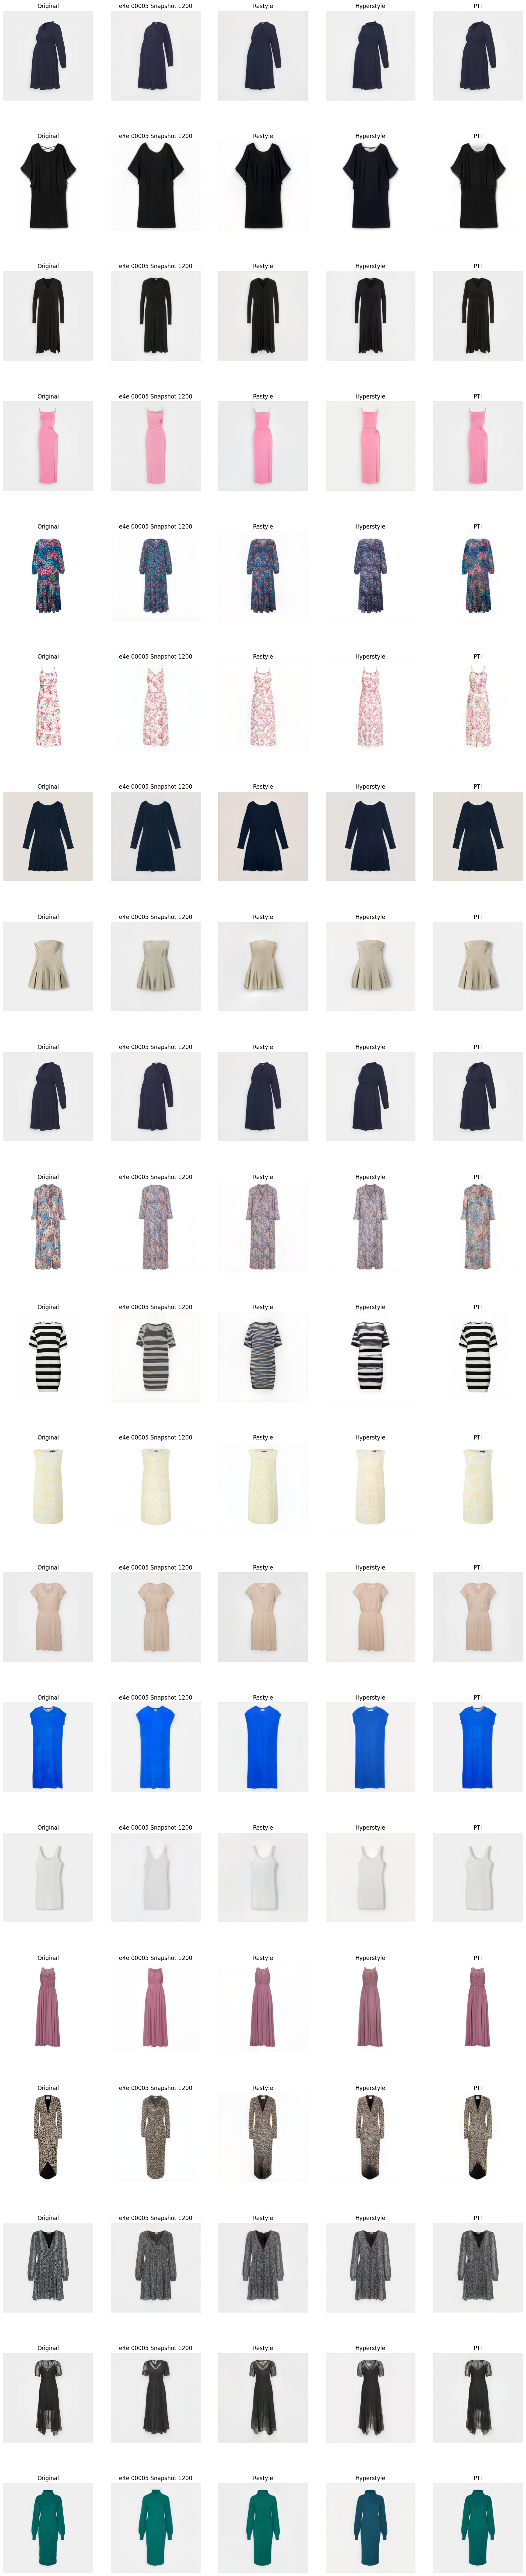

In [5]:
NUM_SAMPLES = 20
np.random.seed(42)
samples = np.random.choice(pti_images, NUM_SAMPLES)

fig, ax = plt.subplots(NUM_SAMPLES, 5, figsize = (20, NUM_SAMPLES*5))
for i in range(NUM_SAMPLES):
    path = samples[i]
    sku = path.split('/')[-1].split('.')[0]
    path_real = [elem for elem in real_images if sku in elem][0]
    path_00003 = [elem for elem in e4e_00003_images if sku in elem][0]
    path_00005 = [elem for elem in e4e_00005_images if sku in elem][0]
    path_restyle = [elem for elem in restyle_images if sku in elem][0]
    path_hyperstyle = [elem for elem in hyperstyle_images if sku in elem][0]

    ax[i, 0].imshow(Image.open(path_real))
    #ax[i, 1].imshow(Image.open(path_00003))
    ax[i, 1].imshow(Image.open(path_00005))
    ax[i, 2].imshow(Image.open(path_restyle))
    ax[i, 3].imshow(Image.open(path_hyperstyle))
    ax[i, 4].imshow(Image.open(path))

    if i%1 == 0:
        ax[i, 0].set_title('Original')
        #ax[i, 1].set_title('e4e 00003 Snapshot 920')
        ax[i, 1].set_title('e4e 00005 Snapshot 1200')
        ax[i, 2].set_title('Restyle')
        ax[i, 3].set_title('Hyperstyle')
        ax[i, 4].set_title('PTI')

for axs in ax.flatten():
    axs.axis('off') 

plt.show()